In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.linear_model
from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline  # For creating the pipeline
from sklearn.impute import SimpleImputer  # For handling missing values
from sklearn.preprocessing import StandardScaler

In [3]:
data = pd.read_csv(r"D:\Data analytics & Science\datasets\housing.csv")

In [34]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,INLAND
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,NEAR OCEAN
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,INLAND
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,NEAR OCEAN
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,<1H OCEAN


In [5]:
data. info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


Proper visualizaqtion using matplotlib

<function matplotlib.pyplot.show(close=None, block=None)>

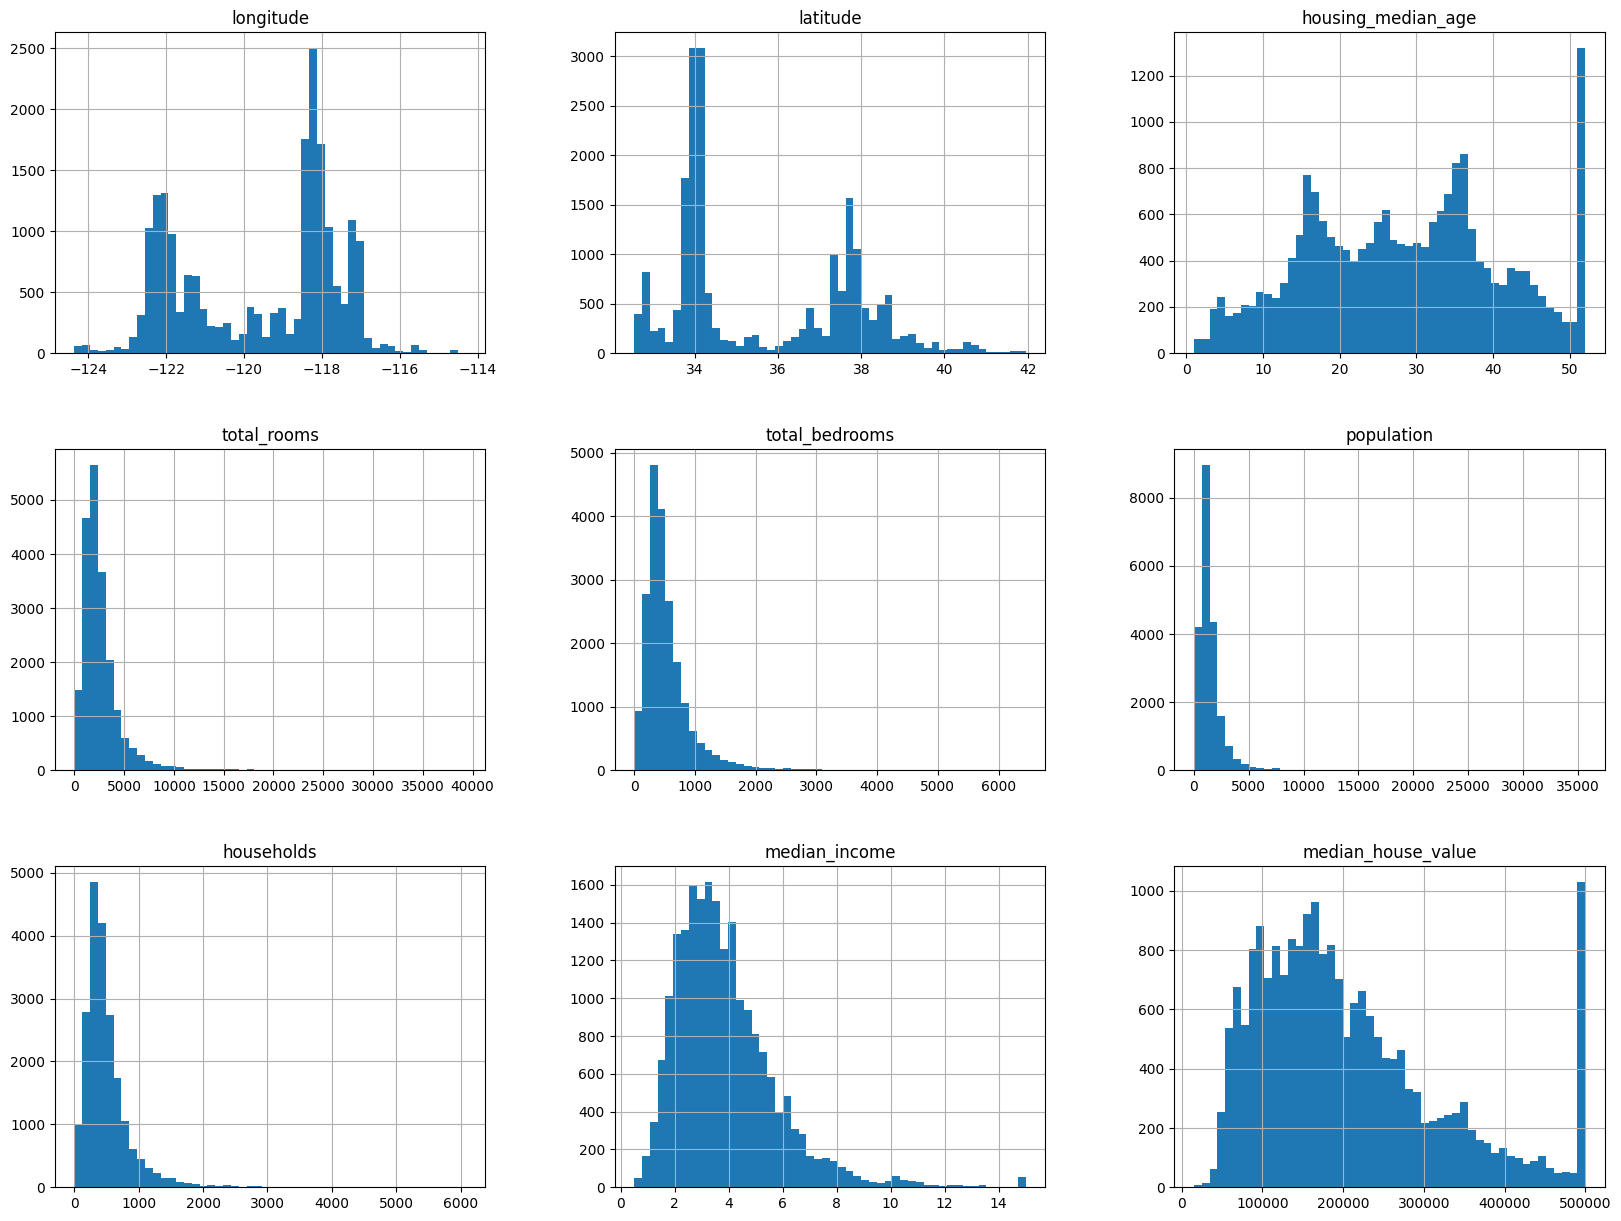

In [7]:
data.hist(bins=50, figsize= (20,15))
plt.show

In [8]:
train_test, test_set, = train_test_split(data,test_size=0.20,random_state=75)

<Axes: >

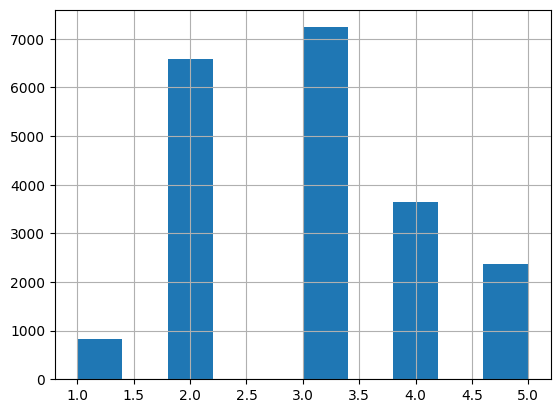

In [9]:
# creating a median income category, supposing the median house prices is based on the median income, and from the histogram, most of the data points are located around 1.5-6

data["income_cat"]= pd.cut(data["median_income"],
                           bins=[0.,1.5,3.0,4.5,6., np.inf],
                           labels=[1,2,3,4,5])
data["income_cat"].hist()

In [10]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size= 0.2, random_state= 42)
for train_index, test_index in split.split(data,data["income_cat"]):
    strat_train_set = data.loc[train_index]
    strat_test_set = data.loc[test_index]

In [11]:
# This line of code calculates the proportion of each category in the income_cat column within the test set (strat_test_set)
strat_test_set["income_cat"].value_counts()/len(strat_test_set)

income_cat
3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: count, dtype: float64

In [12]:
strat_test_set["income_cat"].value_counts()/len(data)

income_cat
3    0.070107
2    0.063760
4    0.035271
5    0.022868
1    0.007994
Name: count, dtype: float64

In [13]:
# Now you should remove the income_cat attribute so the data is back to its original state
for set_ in (strat_train_set, strat_test_set):
 set_.drop("income_cat", axis=1, inplace=True)

In [14]:
# lets create a copy of the train set withouth harming the traon set

In [15]:
data = strat_train_set.copy()

<Axes: xlabel='longitude', ylabel='latitude'>

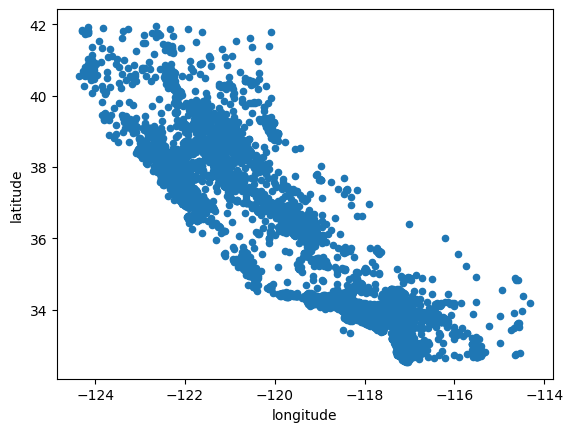

In [16]:
# visualise the data
data.plot(kind="scatter", x="longitude", y="latitude")


<Axes: xlabel='longitude', ylabel='latitude'>

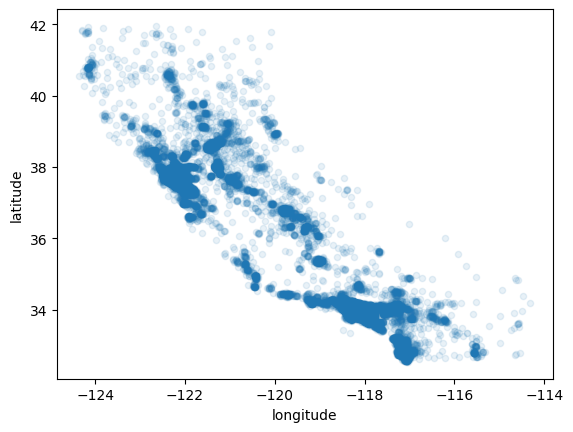

In [17]:
# visualising the high density areas
data.plot(kind= "scatter", x= "longitude", y="latitude", alpha = 0.1)

<Axes: >

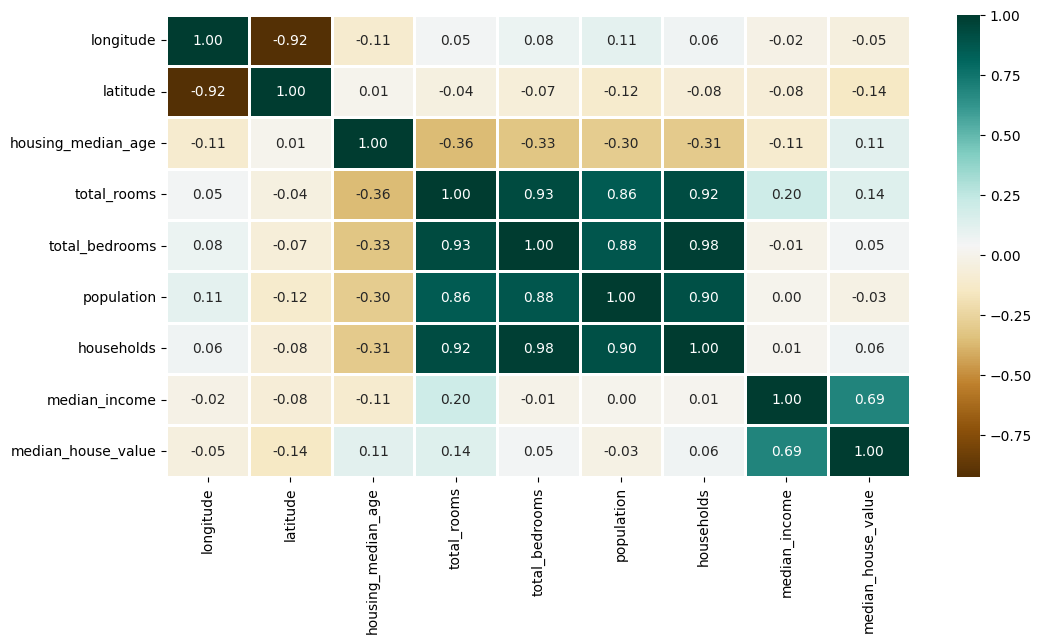

In [18]:
numerical_dataset = data.select_dtypes(include=['number'])

plt.figure(figsize=(12, 6))
sns.heatmap(numerical_dataset.corr(),
            cmap = 'BrBG',
            fmt = '.2f',
            linewidths = 2,
            annot = True)

<Axes: xlabel='median_income', ylabel='median_house_value'>

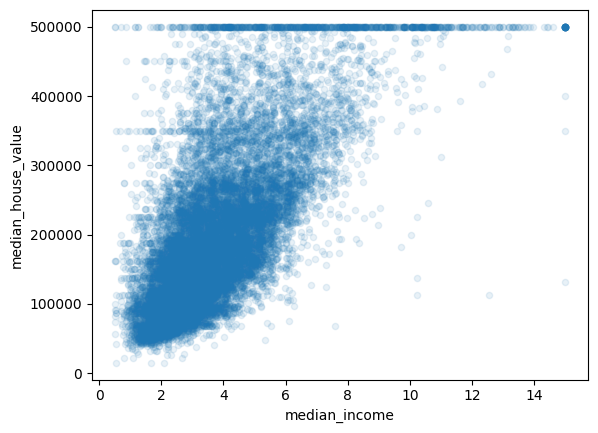

In [19]:
data.plot(kind="scatter", x="median_income", y="median_house_value",
 alpha=0.1)

In [20]:
#  we want to create an attribute for the following ( Feature engineering)
data["rooms_per_household"] = data["total_rooms"]/data["households"]
data["bedrooms_per_room"] = data["total_bedrooms"]/data["total_rooms"]
data["population_per_household"]=data["population"]/data["households"]


<Axes: >

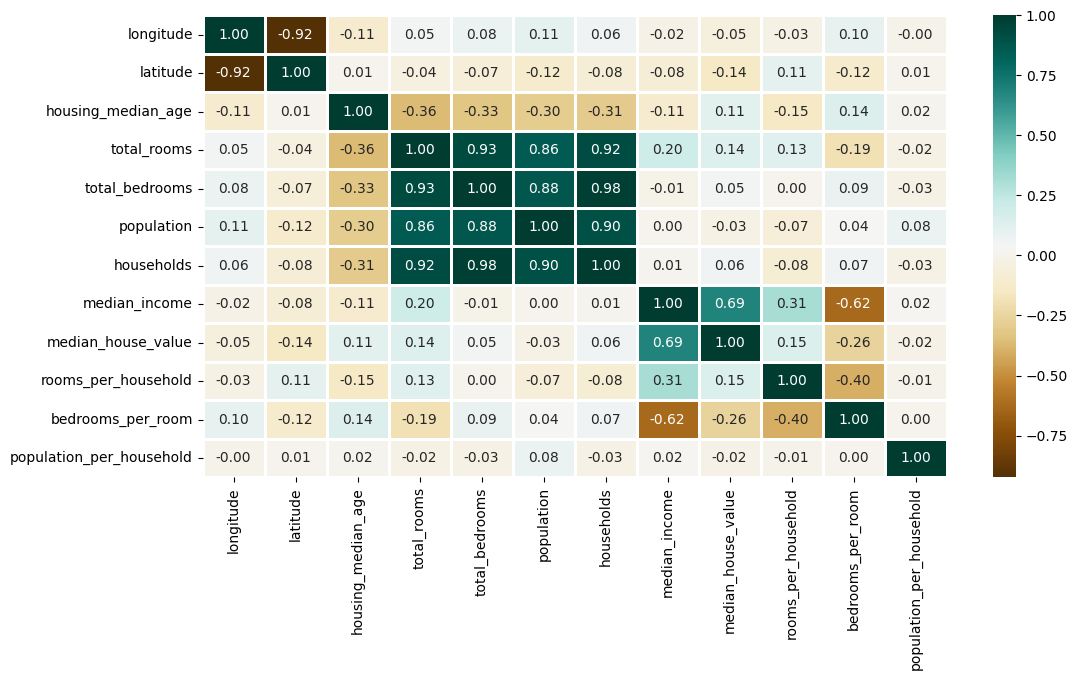

In [21]:
numerical_dataset = data.select_dtypes(include=['number'])

plt.figure(figsize=(12, 6))
sns.heatmap(numerical_dataset.corr(),
            cmap = 'BrBG',
            fmt = '.2f',
            linewidths = 2,
            annot = True)

In [22]:
# reating a copy of te ri test 
data= strat_train_set.drop("median_house_value", axis=1)
data_labels = strat_train_set["median_house_value"].copy()

data cleaning 

In [23]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

# we need to drop the non-numeric columns  because  the simple imputer doesnt work on non-numeric 
housing_num = data.drop("ocean_proximity", axis=1)

# fit and transform the  data
imputed_data = imputer.fit_transform(housing_num)

# putting it back to the data
housing_tr = pd.DataFrame(imputed_data, columns=housing_num.columns)

encoding catgorical variables 

In [24]:
#  creating a column called housing_cat so we can encode our variables 
housin_cat=data[["ocean_proximity"]]
housin_cat.head(10)


,ocean_proximity
12655,INLAND
15502,NEAR OCEAN
2908,INLAND
14053,NEAR OCEAN
20496,<1H OCEAN
1481,NEAR BAY
18125,<1H OCEAN
5830,<1H OCEAN
17989,<1H OCEAN
4861,<1H OCEAN


In [25]:
# using one hot encoding
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housin_cat)
housing_cat_1hot

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 16512 stored elements and shape (16512, 5)>

In [26]:
cat_encoder.categories_


[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [27]:
from sklearn.pipeline import Pipeline  # For creating the pipeline
from sklearn.impute import SimpleImputer  # For handling missing values
from sklearn.preprocessing import StandardScaler

In [28]:
# transforming the new features created 

In [29]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
 ('imputer', SimpleImputer(strategy="median")),
 ('std_scaler', StandardScaler()),
 ])
housing_num_tr = num_pipeline.fit_transform(housing_num)

<!-- using a single transformer to handle all columns both categorical and numeric columns and transforming into the data  -->

In [30]:
from sklearn.compose import ColumnTransformer

num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]
full_pipeline = ColumnTransformer([
 ("num", num_pipeline, num_attribs),
 ("cat", OneHotEncoder(), cat_attribs),
 ])
# housing_prepared = full_pipeline.fit_transform(data)
housing_prepared = full_pipeline.fit_transform(train_set)
test_prepared = full_pipeline.transform(test_set)



NameError: name 'train_set' is not defined

In [ ]:
housing_prepared.shape,test_prepared.shape

((16512, 13), (4128, 13))

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, data_labels)


LinearRegression()

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16512 entries, 12655 to 19773
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16354 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   ocean_proximity     16512 non-null  object 
dtypes: float64(8), object(1)
memory usage: 1.3+ MB


In [ ]:
# predicting the test values
predictions = lin_reg.predict(housing_prepared)
print(predictions)


[210380.51101291 202782.46685734 205846.30651357 ... 204900.57071887
 206139.09285039 198741.95329308]


In [ ]:
from sklearn.metrics import mean_squared_error

housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(data_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

115629.64851804147

In [ ]:
# evaluating the mean square error metric
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(data_labels,predictions )
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 13370215616.405811
